In [2]:
#Importing Libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

## Importing the Data

In [3]:
#Importing Dataset

income_df = pd.read_csv('income_data.csv', sep = r'\s*,\s*', engine = 'python')
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
income_df.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1    

In [5]:
income_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Visualizing and Exploring 

**~ How is the age distributed differently for <=50K and >50K groups?**

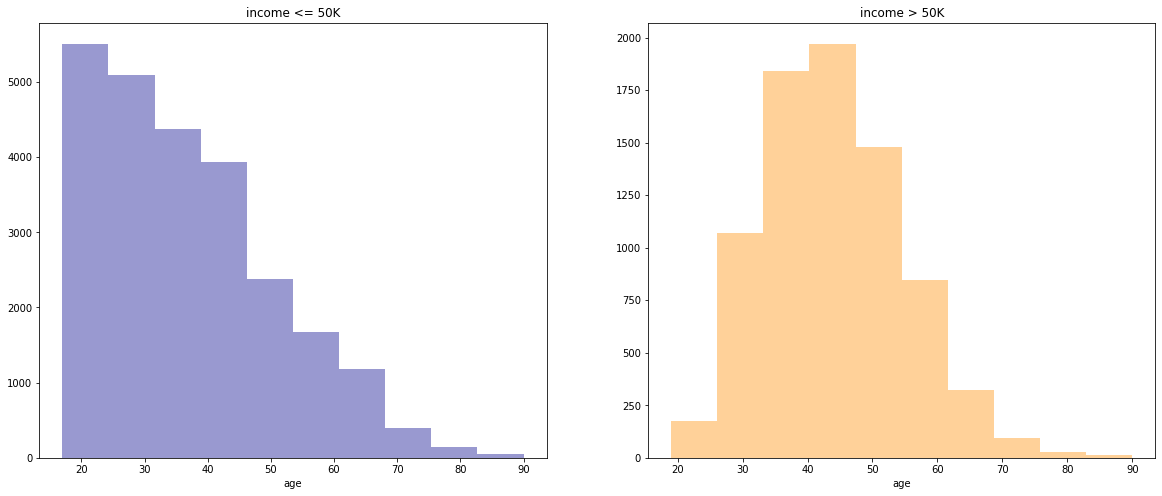

In [6]:
# Visualizing the dataset

f, axes = plt.subplots(1, 2, figsize=(20,8), sharex = False)
axes[0].set_title("income <= 50K")
axes[1].set_title("income > 50K")

sns.distplot(income_df[income_df["income"]=="<=50K"]['age'],
            hist=True, kde=False, bins=10, ax=axes[0], color='darkblue')

sns.distplot(income_df[income_df["income"]==">50K"]['age'],
            hist=True, kde=False, bins=10, ax=axes[1], color='darkorange')

From the above plot, it is clear that people within an age group of 35-55 years have an income of >50K. While people earning <=50K has decreasing distribution with increasing age. There is no abnormality.

**~ How is the age distributed?**

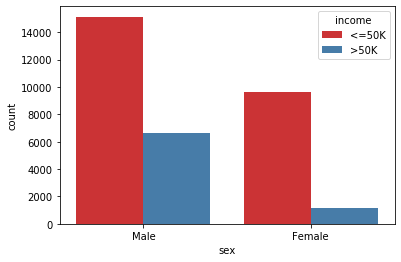

In [7]:
sns.countplot(x=income_df['sex'], hue=income_df['income'],palette='Set1')

We found that there are more male observation than female in our dataset.
Also, it is also distinct that the proportion of male getting more than >50K is larger than proportion of female.

**~ How is income different amongst workclass?**

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, '?'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

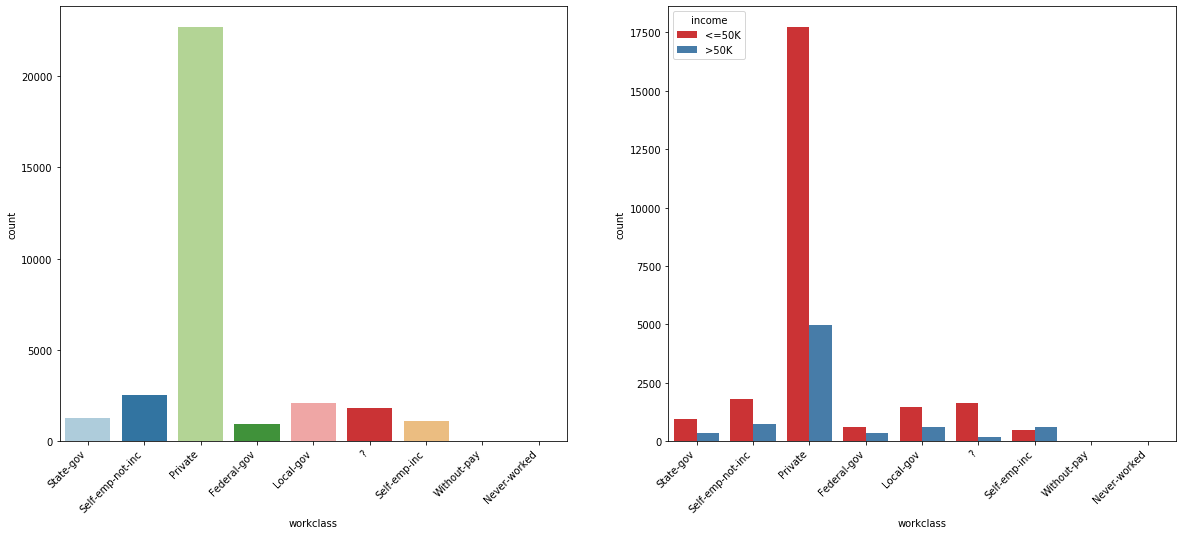

In [8]:
f, axes = plt.subplots(1, 2, figsize=(20,8), sharex=False)

p1 = sns.countplot(data=income_df, x='workclass', palette='Paired', ax=axes[0])
p1.set_xticklabels(p1.get_xticklabels(), rotation=45, horizontalalignment='right')

p2 = sns.countplot(data=income_df, x='workclass', hue = 'income', palette='Set1', ax=axes[1])
p2.set_xticklabels(p2.get_xticklabels(), rotation=45, horizontalalignment='right')

We found that most of observaton in the dataset are in "Private" workclass.
Only "Self-emp-inc" has more people earning >50k than people earning <=50k.
(Note: There is one abnormal workclass "?" that needs to be deleted in next step.)

**~ How will capital gain aof loss affecting the pay?**

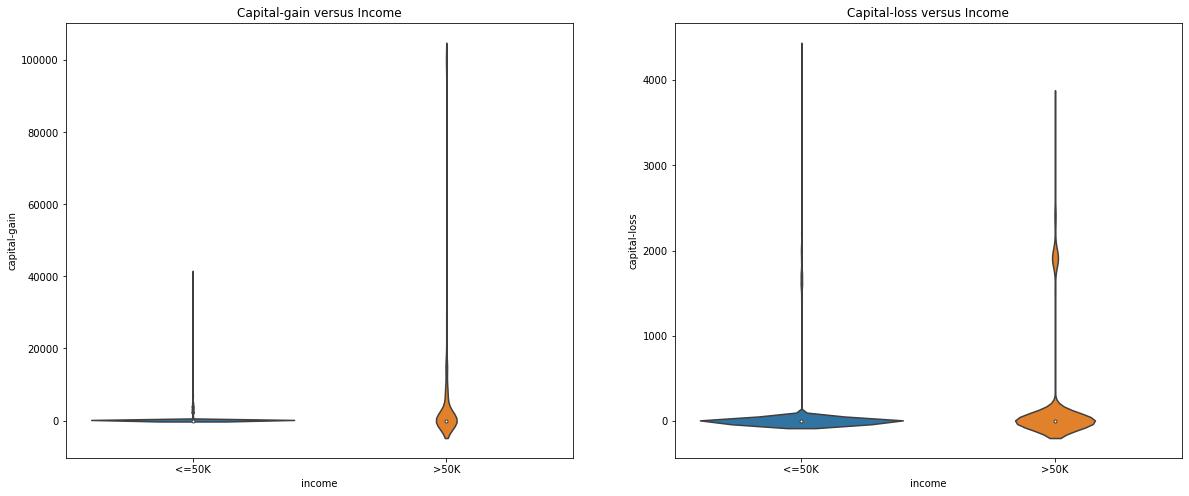

In [9]:
f, axes = plt.subplots(1,2, figsize=(20,8), sharex=False)

axes[0].set_title('Capital-gain versus Income')
axes[1].set_title('Capital-loss versus Income')

sns.violinplot(x=income_df["income"], y=income_df["capital-gain"],ax=axes[0])
sns.violinplot(x=income_df["income"], y=income_df["capital-loss"],ax=axes[1])

It seems there's no much big difference in capital gain or loss for two groups of observation, except that people earning >50k may have higher capital gain than people earning less.

**~ What about the marital status and education level?**

[Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Married-AF-spouse'),
 Text(0, 0, 'Widowed')]

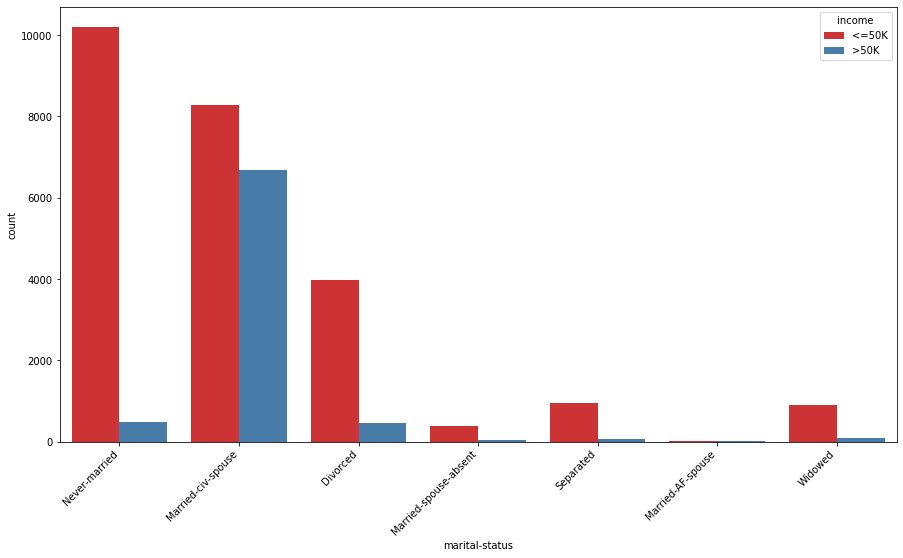

In [10]:
f, axes = plt.subplots(1, 1, figsize=(15, 8), sharex=False)
p3 = sns.countplot(data=income_df, x='marital-status', hue='income', palette='Set1')
p3.set_xticklabels(p3.get_xticklabels(),rotation=45, horizontalalignment='right')

More people in <=50K group are never married while people in >50K group are married.<br>
(Note: The married group are splitted in to three different formats which are to be changed later.)

Both education_num and education indicates the education level. We would use education as it's clear to bucket the education level in different category instead of years of education.

[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, '11th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, '10th'),
 Text(0, 0, '1st-4th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, '12th')]

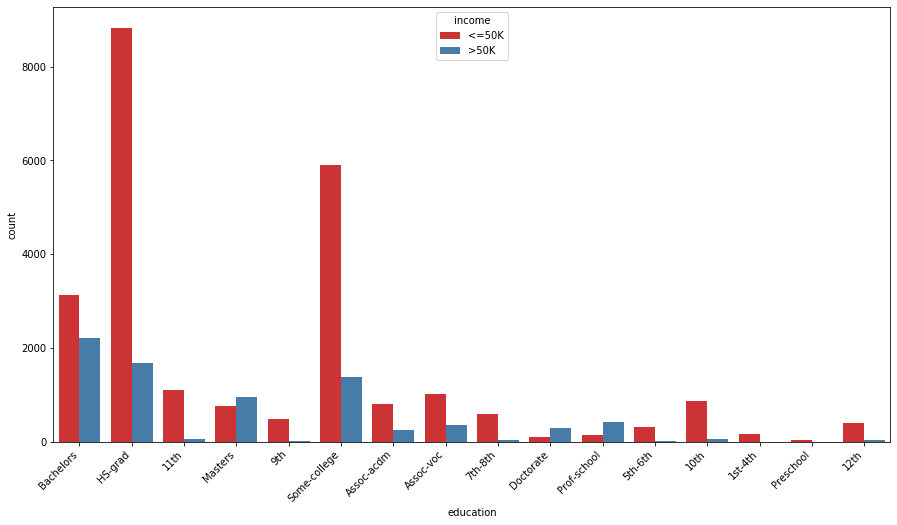

In [11]:
f, axes = plt.subplots(1, 1, figsize=(15, 8), sharex=False)
plt.xlabel('Count')
p4 = sns.countplot(data=income_df, x='education', hue = 'income', palette='Set1')
p4.set_xticklabels(p4.get_xticklabels(),rotation=45, horizontalalignment='right')

Education category is a bit messy which needs to be cleaned in the further steps.

**~ And how about Race and Country?**

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Amer-Indian-Eskimo'),
 Text(0, 0, 'Other')]

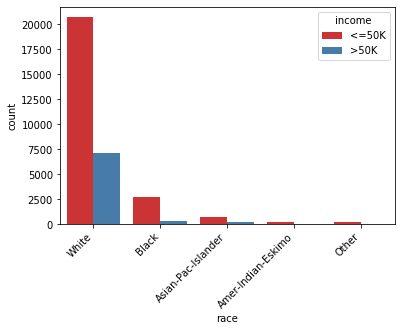

In [12]:
p5 = sns.countplot(x=income_df["race"], hue=income_df["income"],palette= "Set1")
p5.set_xticklabels(p5.get_xticklabels(),rotation=45, horizontalalignment='right')

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'India'),
 Text(0, 0, '?'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Ireland'),
 Text(0, 0

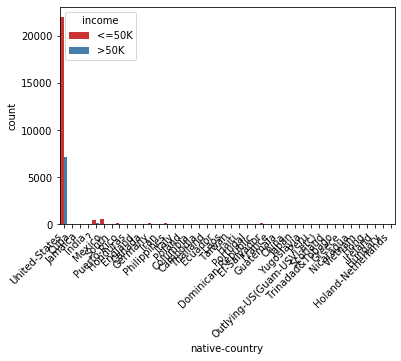

In [13]:
p6 = sns.countplot(x=income_df["native-country"], hue=income_df["income"],palette= "Set1")
p6.set_xticklabels(p6.get_xticklabels(),rotation=45, horizontalalignment='right')

**~ What are the work hours for both the groups?**

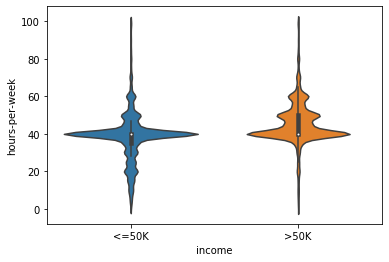

In [17]:
hrswrk = sns.violinplot(x=income_df["income"], y=income_df["hours-per-week"])

In [16]:
income_df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

The data is not a balanced data. But we can't use upsampling or downsampling to maniulate the sample size since we don't know the real proportion of earning in the real population.

## Data Cleaning

In [18]:
new = income_df.copy()

In [19]:
# Deleting the observation workclass = "?"
new = new.drop(new[new["workclass"]=="?"].index, axis=0)

In [24]:
# Merging levels of education
# As for those 1-12th grade, most of people have earnings <=50K, 
# it's reasonable to merge them into one category due to less difference
new['education']=np.where((new["education"]=="12th")|(new["education"]=="11th")|(new["education"]=="10th")|
                            (new["education"]=="9th")|(new["education"]=="7th-8th")|(new["education"]=="5th-6th")|
                             (new['education'] =='1st-4th')|(new['education'] =='Preschool'),
                            'Not-HS-Grad',new['education'])
new['education']=np.where((new["education"]=="Assoc-voc")|(new["education"]=="Assoc-acdm"),
                            'Assoc',new['education'])

new["marital-status"]=np.where((new["marital-status"]=="Married-civ-spouse")|(new["marital-status"]=="Married-spouse-absent")|
                                  (new["marital-status"]=="Married-AF-spouse"),"Married", new["marital-status"])

print(new['education'].value_counts())

print(new['marital-status'].value_counts())

HS-grad         9969
Some-college    6777
Bachelors       5182
Not-HS-Grad     3825
Assoc           2341
Masters         1675
Prof-school      558
Doctorate        398
Name: education, dtype: int64
Married          14750
Never-married     9917
Divorced          4259
Separated          959
Widowed            840
Name: marital-status, dtype: int64


In [21]:
new.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Not-HS-Grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,Not-HS-Grad,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Encoding Categorical Variable**

For independent variables, since we will use logistic regression, we need to get all the variables dummied and get rid of the first dummied result.


In [28]:
category = {'workclass', 'education', 'marital-status', 'race', 'sex'}
for var in category:
    if var!='income':
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(new[var], prefix=var,drop_first=True)
        new = pd.concat([new,cat_list], axis = 1)
        new = new.drop(var, 1)
new.head()

,age,fnlwgt,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,...,race_Black,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college
0,39,77516,13,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,...,0,0,1,1,0,0,0,0,0,0
1,50,83311,13,Exec-managerial,Husband,0,0,13,United-States,<=50K,...,0,0,1,1,0,0,0,0,0,0
2,38,215646,9,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,...,0,0,1,0,0,1,0,0,0,0
3,53,234721,7,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,13,Prof-specialty,Wife,0,0,40,Cuba,<=50K,...,1,0,0,1,0,0,0,0,0,0


In [29]:
#Dropping redundant variable

new.drop(["education-num","relationship","occupation","native-country"],axis=1,inplace=True)
new.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Black,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college
0,39,77516,2174,0,40,<=50K,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,50,83311,0,0,13,<=50K,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,38,215646,0,0,40,<=50K,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,53,234721,0,0,40,<=50K,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,<=50K,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [31]:
new["y"]=LabelEncoder().fit_transform(new.income)
new

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college,y
0,39,77516,2174,0,40,<=50K,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,50,83311,0,0,13,<=50K,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,38,215646,0,0,40,<=50K,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,53,234721,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,0,0,40,<=50K,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,<=50K,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
32557,40,154374,0,0,40,>50K,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
32558,58,151910,0,0,40,<=50K,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
32559,22,201490,0,0,20,<=50K,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [32]:
new["y"]=new["y"].astype("category")

In [33]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           30725 non-null  int64   
 1   fnlwgt                        30725 non-null  int64   
 2   capital-gain                  30725 non-null  int64   
 3   capital-loss                  30725 non-null  int64   
 4   hours-per-week                30725 non-null  int64   
 5   income                        30725 non-null  object  
 6   workclass_Local-gov           30725 non-null  uint8   
 7   workclass_Never-worked        30725 non-null  uint8   
 8   workclass_Private             30725 non-null  uint8   
 9   workclass_Self-emp-inc        30725 non-null  uint8   
 10  workclass_Self-emp-not-inc    30725 non-null  uint8   
 11  workclass_State-gov           30725 non-null  uint8   
 12  workclass_Without-pay         30725 non-null  

## Fitting data into Logistic Regression

In [34]:
X = new.copy().drop(["income","y"], axis=1)
y = new.copy()["y"]

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123, stratify=new["y"])

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24580 entries, 21804 to 3365
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           24580 non-null  int64
 1   fnlwgt                        24580 non-null  int64
 2   capital-gain                  24580 non-null  int64
 3   capital-loss                  24580 non-null  int64
 4   hours-per-week                24580 non-null  int64
 5   workclass_Local-gov           24580 non-null  uint8
 6   workclass_Never-worked        24580 non-null  uint8
 7   workclass_Private             24580 non-null  uint8
 8   workclass_Self-emp-inc        24580 non-null  uint8
 9   workclass_Self-emp-not-inc    24580 non-null  uint8
 10  workclass_State-gov           24580 non-null  uint8
 11  workclass_Without-pay         24580 non-null  uint8
 12  marital-status_Married        24580 non-null  uint8
 13  marital-status_Never-married

In [37]:
# Fitting logistic regression model

logireg = LogisticRegression()
logireg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Function to get the prediction output
def get_result(estimator, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        display = metrics.plot_confusion_matrix(
                                     estimator,
                                     X_test,
                                     y_test,
                                     labels = y_test.unique(),
                                     cmap=plt.cm.Blues,
                                     values_format = '.2f',
                                     normalize = normalize) #if non-normalized, confusion matrix are counted in number;
                                                            #if normalized, confusion matrix are shown in percentage
        display.ax_.set_title(title)

        print(title)
        print(display.confusion_matrix)
        
    y_pred = estimator.predict(X_test)
    summary = metrics.precision_recall_fscore_support(y_test, y_pred, pos_label=">50K")
    print('\n\n')
    print('class:  \t<=50K\t\t>50K')
    print('precision:\t%.2f\t\t%.2f'%(summary[0][0],summary[0][1]))
    print('recall:  \t%.2f\t\t%.2f'%(summary[1][0],summary[1][1]))
    print('f1_score:\t%.2f\t\t%.2f'%(summary[2][0],summary[2][1]))
    print('support:\t%d\t\t%.d'%(summary[3][0],summary[3][1]))

Confusion matrix, without normalization
[[4432  183]
 [1107  423]]
Normalized confusion matrix
[[0.9603467  0.0396533 ]
 [0.72352941 0.27647059]]



class:  	<=50K		>50K
precision:	0.80		0.70
recall:  	0.96		0.28
f1_score:	0.87		0.40
support:	4615		1530


/Users/abhijitpadhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to '>50K') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


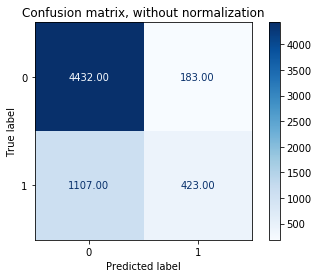

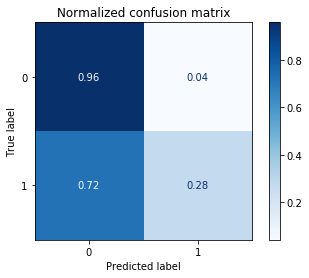

In [39]:
get_result(logireg, X_test, y_test)

From the result output, we can see that **recall** and **F1-score** of income >50k is pretty low. That is just for simply including all the features given in the dataset in the regression.

***Verifying the results excluding unnecessary features by regularization***

## Feature Selection

In [41]:
featsel = SelectFromModel(LogisticRegression(penalty='l1',C=0.05, solver = "liblinear"))
featsel.fit(X_train, y_train)
featsel.get_support()

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [42]:
# get which feature is left after lasso 
print(X_train.columns[featsel.get_support(indices=True)])

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'marital-status_Married', 'marital-status_Never-married', 'sex_Male',
       'race_White', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Not-HS-Grad',
       'education_Prof-school', 'education_Some-college'],
      dtype='object')


In [48]:
X_train_lasso = featsel.transform(X_train)
X_test_lasso = featsel.transform(X_test)

Confusion matrix, without normalization
[[4247  368]
 [ 672  858]]
Normalized confusion matrix
[[0.92026002 0.07973998]
 [0.43921569 0.56078431]]



class:  	<=50K		>50K
precision:	0.86		0.70
recall:  	0.92		0.56
f1_score:	0.89		0.62
support:	4615		1530


/Users/abhijitpadhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/abhijitpadhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to '>50K') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


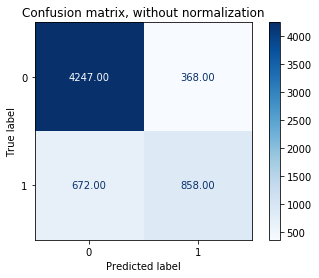

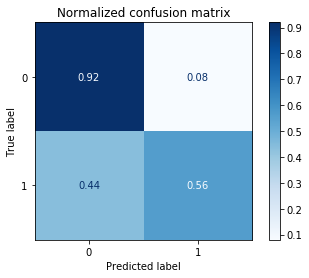

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train_lasso, y_train)
get_result(log_reg, X_test_lasso, y_test)